# Ститистический анализ данных на примере сервиса проката самокатов GoFast

В данном исследовании предстоит оценить сервис проката самокатов `GoFast`.
Для совершения поездок пользователи используют мобильное приложение. Необходимо провести исследование и проверить некоторые гипотезы,которые помогут бизнесу вырасти.

Сервисом можно воспользоваться:
- без подписки
  - абонентская плата отсутствует,
  - стоимость одной минуты поездки - 8 рублей,
  - стоимость старта(начала поездки)  - 50 рублей;
- с подпиской Ultra:
  - абонентская плата - 199 рублей в месяц,
  - стоимость одной минуты поездки - 6 рублей в минуту
  - стоимость старта - бесплатно.

**Описание данных**
Данные содержатся в 3 датафреймах.

**Пользователи:**
- `user_id` - уникальный идентификатор пользователя,
- `name` - имя пользователя,
- `age` - возраст,
- `city` - город,
- `subscription_type` - тип подписки.

**Поездки:**
- `user_id` - уникальный идентификатор пользователя,
- `distance` - расстояние, которое проехал пользователь за сессию( в метрах)
- `duration` - продолжительность сессии в минутах
- `date` - датапоездки

**Подписки:**
- `subscription_type` - тип подписки,
- `minute_price` - стоимость одной минуты подписки  данной подписке,
- `start_ride_price` - стоимость начала поездки,
- `subscription_fee` - стоимсоть ежемесячного платежа.

***<u>Цель: проанализировать данные, проверить некоторые гипотезы, представленные руководством.</u>***


***План работы:***
- изучить исходные данные,
- провести предобработку данных,
- провести исследовательский анализ данных,
- объединить данные в один датафрейм,
- расчитать выручку,
- проверить гипотезы,
- написать выводы и предложения.

##  Загрузка данных и изучение общей информации

###  Подключим библиотеки и откроем датафреймы

In [1]:
#подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#открываем файл "Пользователи" csv
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('C:\\Users\\ignat\\OneDrive\\Рабочий стол\\Аналитик Практикум\\Статистический анализ данных\\users_go.csv')

In [3]:
#открываем файл "Поездки" csv
try:
    rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'], dayfirst=True)
except:
    rides = pd.read_csv('C:\\Users\\ignat\\OneDrive\\Рабочий стол\\Аналитик Практикум\\Статистический анализ данных\\rides_go.csv', 
                        parse_dates=['date'], dayfirst=True)

In [4]:
#открываем файл "Подписки" csv
try:
    subscrip = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscrip = pd.read_csv('C:\\Users\\ignat\\OneDrive\\Рабочий стол\\Аналитик Практикум\\Статистический анализ данных\\subscriptions_go.csv')

### Выгрузим первые строки и информацию о датафреймах.

Для облегчения кода создадим фунцию для просмотра информации.

In [5]:
def summary(dataset):
    '''
    Выводит первые строки датасета и информацию о нём
    '''
    display(dataset.head())
    display(dataset.info())


In [6]:
#инфо, пользователи
summary(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

In [7]:
#инфо, поездки
summary(rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

In [8]:
#инфо, тарифная сетка
summary(subscrip)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

**Вывод:** В нашем распоряжении 3 датафрейма: пользователи сервиса, информация о поздках, тарифная сетка с подпиской и без. Из первого датафрейма можно определить возраст клиента, город его проживания и имеет ли он подписку ultra, общее количество пользователей - 1565 (без учёта возможных дубликатов). Из второго датафрейма можно увидеть, какое растояние преодолено во время каждой поездки, общее время аренды и дата совершения поездки. Третий датафрейм дает общее понимание о тарифах `ultra и free` - стоимость минуты поездки, стоимсоть старта и стоимость самой подписки.

## Предобработка данных

### Проверим, за какой период предствалены данные

In [9]:
#выводим крайние значения даты
display(rides['date'].min())
rides['date'].max()

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

**Вывод:** предоставлены данные за 2021 год с 1 января по 30 декабря.

### Создадим новый столбец с номером месяца на основе столбца date

In [10]:
# добаляем столбец (месяц)
rides['month'] = rides['date'].dt.month

### Проверяем на наличие пустых строк и явных дубликатов

In [11]:
# проверяем наличие пустых строк
users.isna().mean()

user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64

In [12]:
# проверяем наличие пустых строк
rides.isna().mean()

user_id     0.0
distance    0.0
duration    0.0
date        0.0
month       0.0
dtype: float64

In [13]:
# проверяем наличие пустых строк
subscrip.isna().mean()

subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

Пустых строк нет! Далее проверим на наличие явных дубликатов

In [14]:
# ищем дубликаты
users.duplicated().sum()

31

Обнаружился 31 дубликат. Удаляем.

In [15]:
users = users.drop_duplicates()

In [16]:
# ищем дубликаты
rides.duplicated().sum()

0

Здесь всё хорошо.

**Вывод:** пустых ячеек не обнаружено. В датафрейме с пользователями обнаружен 31 явный дубликат, который был удалён. Для удобства дальнейшего анализа добавлен столбец с номером месяца.

##  Исследовательский анализ данных

###  Количество пользователей по городам

In [17]:
# создаём сводную таблицу
cities = users.pivot_table(index='city', 
                           values='name', 
                           aggfunc='count').sort_values(by='name')
cities.columns = ['users']
cities['percent_users'] = (cities['users'] / 
                           cities['users'].sum() * 100).round(1)
cities

,users,percent_users
city,,
Москва,168,11.0
Тюмень,180,11.7
Омск,183,11.9
Сочи,189,12.3
Краснодар,193,12.6
Ростов-на-Дону,198,12.9
Екатеринбург,204,13.3
Пятигорск,219,14.3


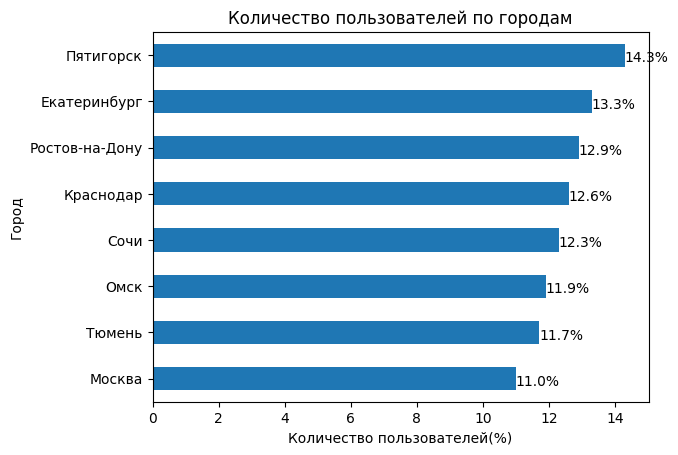

In [18]:
#строим график
total_users = cities.sum()
ax = cities['percent_users'].plot(kind='barh', legend=[])

for i in ax.patches:
   plt.text(i.get_width(), i.get_y() + 0.1, str(round((i.get_width()), 2)) + '%', 
            fontsize=10, 
            color='black')

plt.xlabel('Количество пользователей(%)')
plt.ylabel('Город')
plt.title('Количество пользователей по городам')
plt.show()

**Вывод:** сервис проката представлен в 8 городах. Меньше всего пользователей в Москве - 168, больше всего - в Пятигорске - 219. В каждом городе количество пользователей составляет от 11% до 14,3% от общего количества пользователей. Можно говорить, что пользователи распределены по городам равномерно.

### Соотношение количества позьзователей с подпиской и без

In [19]:
# создаём сводную таблицу
sub_total = users.pivot_table(index='subscription_type', 
                              values='name', 
                              aggfunc='count').sort_values(by='name')
sub_total.columns = ['count']

# добаляем столбец с долями
sub_total['rate'] = sub_total['count'] / len(users)
sub_total

,count,rate
subscription_type,,
ultra,699,0.455671
free,835,0.544329


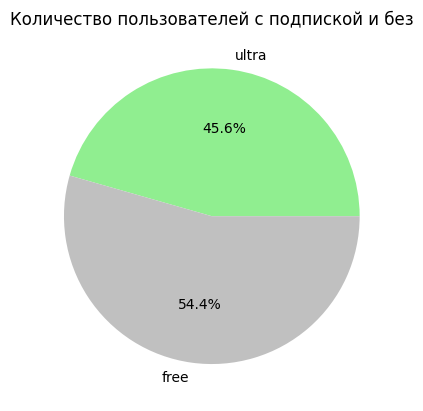

In [20]:
# график для наглядности
sub_total['count'].plot(kind='pie',
                        autopct = '%0.1f%%', 
                        colors=['lightgreen', 'silver'])

plt.ylabel('')
plt.title('Количество пользователей с подпиской и без')
plt.show()

**Вывод:** 45,6% пользователей подлючили подписку ultra, остальные 54,4% этого пока не сделали.

### Распределение пользователей по возрасту

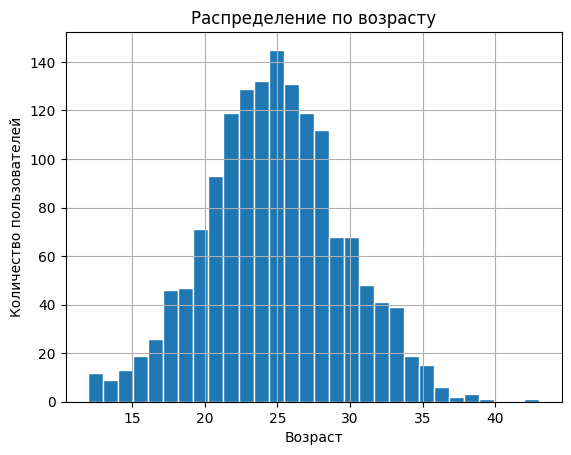

In [21]:
# строим гистограмму
users['age'].hist(bins=30, edgecolor='white')

plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение по возрасту')
plt.show()

In [22]:
users['age'].describe().round(2)

count    1534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

Посмотрим более детально, пользователей какого возраста больше всего и меньше всего.

In [23]:
#ыводим максимальное и минимальное количество пользователей по возрастам
display(users['age'].value_counts().head())
users['age'].value_counts(ascending=True).head()

25    145
24    132
26    131
23    129
27    119
Name: age, dtype: int64

43    1
39    1
37    2
38    3
12    4
Name: age, dtype: int64

In [24]:
#процент пользователей,попавших в межквартильный размах
(users.query('22 <= age <= 28')['age'].count() / users['age'].count()*100).round(1)

57.8

In [25]:
#ищем самого возрастного пользователя
users.query('age == 43')

,user_id,name,age,city,subscription_type
1201,1202,Ангелина,43,Москва,free


In [26]:
display(rides.query('user_id == 1202')['duration'].sum().round(0))
rides.query('user_id == 1202')['distance'].sum().round(0)

282.0

43495.0

In [27]:
#ищем самых молодых пользователей
users.query('age == 12')

,user_id,name,age,city,subscription_type
34,35,Руслан,12,Пятигорск,ultra
66,67,Анастасия,12,Ростов-на-Дону,ultra
664,665,Герман,12,Сочи,ultra
727,728,Вячеслав,12,Пятигорск,free


**Вывод:** средний возраст пользователя - 25 лет. И именно такого возраста пользователей больше всего. Распределение по возрастам является нормальным, не имеет больших выбросов. Межквартильный размах находится в диапазоне от 22 до 28 лет, таких пользователей почти 58%. Самые молодые водители самоката имеют возраст 12 лет, таких нашлось 4 человека, двое из которых уверенно входят в первую сотню зарегистрировавшихся, то есть пользуюся сервисом с самого основания. Они уже в полной мере оценили все достоинства сервиса и подключили подписку `Ultra`. Самому возрастному пользователю 43 года, им стала Ангелина из Москвы. Между прочим, очень активный пользователь! Преодолела расстояние больше 43 км и провела в аренде больше 5 часов. Возможно, стоит как-то отметить данного пользователя знаком внимания, например подарить месяц подписки, которую она до сих пор не подключила? Возможно, тогда её лояльность ещё больше вырастет и она станет адвокатом бренда.

###  Расстояние за одну поездку

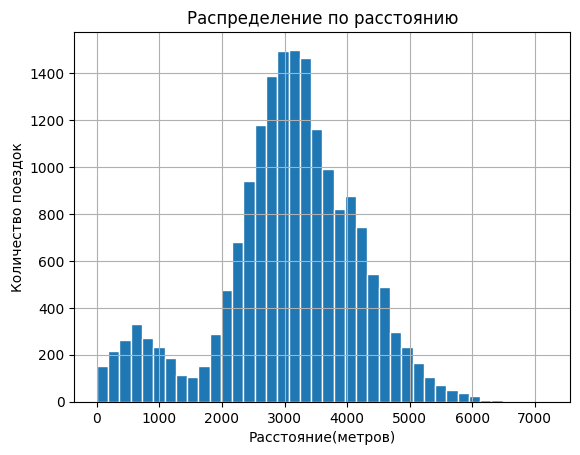

In [28]:
# строим гистограмму
rides['distance'].hist(bins=40, edgecolor='white')

plt.xlabel('Расстояние(метров)')
plt.ylabel('Количество поездок')
plt.title('Распределение по расстоянию')
plt.show()

In [29]:
rides['distance'].describe().round(2)

count    18068.00
mean      3070.66
std       1116.83
min          0.86
25%       2543.23
50%       3133.61
75%       3776.22
max       7211.01
Name: distance, dtype: float64

Проверим, какие пользователи совершили сверхкороткие поездки, менее 200 метров.

In [30]:
#выводим первые и последние 10 строк
display(rides.query('distance < 200').head(10))
rides.query('distance < 200').tail(10)

,user_id,distance,duration,date,month
6611,707,28.793204,14.143966,2021-09-12,9
6666,711,138.727939,7.396366,2021-03-04,3
6691,712,23.963062,2.053251,2021-11-22,11
6699,713,195.694445,12.559127,2021-08-02,8
6794,720,193.383776,12.773535,2021-03-01,3
6801,720,102.323624,2.292353,2021-09-20,9
6816,721,62.568138,7.178766,2021-09-25,9
6850,724,30.473763,3.166221,2021-05-09,5
6976,732,153.237015,12.656730,2021-07-19,7
7006,734,181.395000,12.725580,2021-09-08,9


,user_id,distance,duration,date,month
17712,1510,166.223109,2.343910,2021-09-06,9
17722,1511,87.430522,3.218576,2021-01-21,1
17760,1514,75.573191,5.174400,2021-01-26,1
17808,1517,180.812768,11.493126,2021-01-10,1
17856,1521,106.417577,9.304050,2021-04-04,4
17951,1527,134.078586,5.502795,2021-10-26,10
17965,1528,182.743404,3.730974,2021-09-15,9
17989,1530,133.534786,5.267070,2021-01-10,1
17990,1530,105.796106,12.244145,2021-01-21,1
18058,1534,195.447469,6.469074,2021-06-11,6


Прооверим получившуюся выборку на наличие подписки.

In [31]:
users.query('user_id in [707,711,712,713,720,721,724,732,734]')

,user_id,name,age,city,subscription_type
706,707,Артём,27,Сочи,free
710,711,Степан,25,Екатеринбург,free
711,712,Дарья,28,Москва,free
712,713,Святослав,30,Краснодар,free
719,720,Сергей,25,Тюмень,free
720,721,Андрей,27,Пятигорск,free
723,724,Елизавета,23,Краснодар,free
731,732,Мирослава,29,Омск,free
733,734,Анна,28,Омск,free


In [32]:
users.query('user_id in [1510,1511,1514,1517,1521,1527,1528,1530,1534]')

,user_id,name,age,city,subscription_type
1509,1510,Эмиль,25,Краснодар,free
1510,1511,Элина,27,Краснодар,free
1513,1514,Ева,25,Тюмень,free
1516,1517,Давид,25,Тюмень,free
1520,1521,Галина,26,Пятигорск,free
1526,1527,Захар,24,Омск,free
1527,1528,Анна,25,Пятигорск,free
1529,1530,Ростислав,29,Сочи,free
1533,1534,Альберт,25,Краснодар,free


Проверим самые длинные по расстоянию поездки

In [33]:
rides.query('distance > 7000')

,user_id,distance,duration,date,month
16309,1411,7211.007745,0.500000,2021-04-15,4
16484,1422,7066.003772,23.619318,2021-02-12,2


Кажется, обнаружилась аномалия. Расстояние больше 7 км, а время аренды 0,5 минуты. Такого быть не может. Проверим, сколько еще поездок были такой длительности.

In [34]:
rides.query('duration == 0.5')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [35]:
#посмотрим общее расстояние за эти поездки
rides.query('duration == 0.5')['distance'].sum() / 1000

485.75177211092165

In [36]:
#доля таких поездок от общего киличества
(rides.query('duration == 0.5')['duration'].count() / 
 rides['duration'].count()*100).round(2)

0.53

**Вывод:** Среднее расстояние за поездку составляет 3070 метров, медиана - 3133 метра. Значения очень близкие между собой, значит больших выбросов немного. Минимальное расстояние за поездку менее 1 метра, скорее всего с самокатом возникли проблемы и поездку пришлось отменить. Рекордсмен же проехал за раз 7211 метров! На графике видно маленький пик в районе 500 метров. Судя по выкладке выше, чаще такие поездки совершают пользователи, зарегистрированные позже других (новички), об этом говорит "плотность" их расположения(их id идут практически подряд), также короткие поезди совершают клиенты без подписки ultra, опытные пользователи реже берут самокаты для сверхкоротких поездок. Возможно, у первых 700 пользователей также были поездки короче 200 метров, но они остались за пределами имеющейся информации(в предыдущие периоды). В целом, гистограмма имеет нормальное распределение.

***Внимание!!!*** В данных обнаружены поездки, длительностью 0,5 минуты, но с большими пробегами. Как минимум 95 таких поездок с общим пробегом 485 километров! Доля таких поездок от общего количества составляет 0,53%. Это те поездки, на которых компания не только не зарабатывает, но и расходует ресурс самокатов. В данном случае можно говорить о техническом сбое, когда таймер при начале поездки не запускается. Рекомендуется проверить данные случаи ответственным тех специалистам.

###  Продолжительность поездок

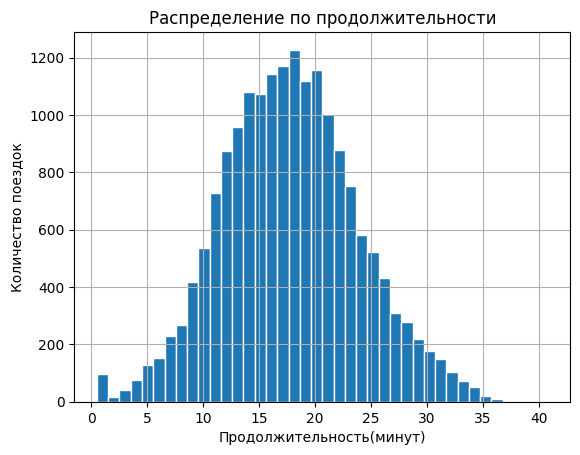

In [37]:
rides['duration'].hist(bins=40, edgecolor='white')

plt.xlabel('Продолжительность(минут)')
plt.ylabel('Количество поездок')
plt.title('Распределение по продолжительности')
plt.show()

In [38]:
rides['duration'].describe().round(2)

count    18068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

**Вывод:**  среднее время аренды составляет 17,7 минуты. Межквартильный размах составляет 13,6 - 21,7 минуты. данное распределение является ормальным. Максимальная сессия составила почти 41 минуту. 
Обратите внимание, на столбец около 0. Здесь также можно увидеть, что таких поездок около 100. О природе данных поездок написано выше - это не отказы от поездок, а незапустившийся таймер, расстояния в таких поездках существенные

## Объединение данных

### Объединение трёх имеющихся датафреймов в один

In [39]:
#используем метод merge
df = users.merge(rides, on='user_id', how='left')
df = df.merge(subscrip, on='subscription_type', how='left')
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Проверим новый датафрейм на наличие пропусков

In [40]:
#проверяем новый датафрем на ошибки
display(summary(df))
df.isna().mean()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


None

None

user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
distance             0.0
duration             0.0
date                 0.0
month                0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

In [41]:
#смотрим количество строк ДО объединения
summary(rides)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


None

**Вывод:** объединение прошло удачно. Датафреймы соединились корректно, строки не потеряны, пустых ячеек не появилось. Теперь сразу видна общая информация о пользователе, поездке и тарифе.

### Разделение датафрейма на две части: с подпиской ultra и без неё

Создадим 2 датафрейма и сразу проверим размерность и пропуски в них.

In [42]:
#с подпиской
df_ultra = df[df['subscription_type'] == 'ultra']

display(summary(df_ultra))
df_ultra.isna().sum()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


None

None

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [43]:
#без подписки
df_free = df[df['subscription_type'] == 'free']

display(summary(df_free))
df_free.isna().sum()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


None

None

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Вывод:** датафрейм успешно разделен на поездки с подпиской и без нее. Строки не потеряны, пропуски не появились.

### Визуализация данных по поездкам с подпиской и без таковой

Серым обозначим пользователей без подписки, зеленым - с подпиской Ultra

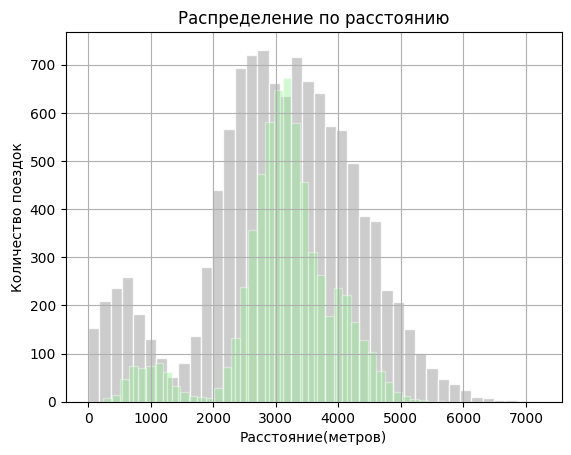

In [44]:
plt.hist(df_free['distance'], 
         bins=40,
         alpha=0.8, 
         edgecolor='white', 
         color='silver')
plt.hist(df_ultra['distance'], 
         bins=40, 
         alpha=0.4, 
         edgecolor='white', 
         color='lightgreen')


plt.grid(True)
plt.xlabel('Расстояние(метров)')
plt.ylabel('Количество поездок')
plt.title('Распределение по расстоянию')
plt.show()

In [45]:
#ultra
df_ultra['distance'].describe().round(2)

count    6500.00
mean     3115.45
std       836.90
min       244.21
25%      2785.44
50%      3148.64
75%      3560.57
max      5699.77
Name: distance, dtype: float64

In [46]:
#free
df_free['distance'].describe().round(2)

count    11568.00
mean      3045.50
std       1246.17
min          0.86
25%       2366.56
50%       3114.65
75%       3905.70
max       7211.01
Name: distance, dtype: float64

**Вывод:** среднее расстояние за поездку в обоих случаях примерно равно 3100 метров, в то же время расстояния во время аренды с подпиской расположены более плотно отностительно среднего значения. Также с подпиской полностью отсутствуют ультракороткие поездки, в то время как в арендах без подписки около 150 поездок в принципе имеют значения близкие к 0, то есть поездки не состоялись.

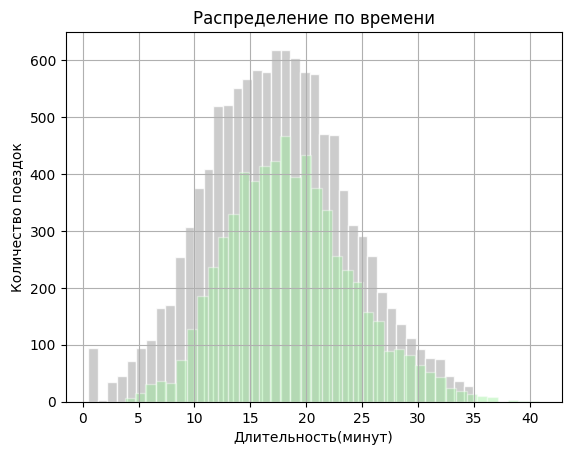

In [47]:
plt.hist(df_free['duration'], 
         bins=40, 
         alpha=0.8, 
         edgecolor='white', 
         color='silver')
plt.hist(df_ultra['duration'], 
         bins=40, 
         alpha=0.4,
         edgecolor='white', 
         color='lightgreen')

plt.grid(True)
plt.xlabel('Длительность(минут)')
plt.ylabel('Количество поездок')
plt.title('Распределение по времени')
plt.show()

In [48]:
df_ultra['duration'].describe().round(2)

count    6500.00
mean       18.54
std         5.57
min         3.76
25%        14.52
50%        18.18
75%        21.88
max        40.82
Name: duration, dtype: float64

In [49]:
df_free['duration'].describe().round(2)

count    11568.00
mean        17.39
std          6.33
min          0.50
25%         12.96
50%         17.33
75%         21.59
max         34.95
Name: duration, dtype: float64

**Вывод:** из инфографики видно, что несмотря на платный старт и более высокую стоимость минуты без подписки, такие поездки совершаются почти вдвое чаще, чем с подпиской. Длительность поездок в среднем также примерно одинакова - 17-18 минут. Без подписки присутсвует около 100 поездок, длительностью 1 минута - опять же те поезки с невключённым таймером. У пользователей с подпиской таких поездок нет. Интересное наблюдение: максимальное расстояние преодолел пользователь без подписки, а самая долгая аренда была с подпиской. Это может свидетельствовать о том, что пользователи с подпиской выбирают более низкую скорость передвижения во время поездок, так как стоимость минуты у них ниже на 25%.

##  Подсчет выручки

###  Создадим датафрейм с агрегированными данными о поездках

Для подсчета выручки необходимо округлить длительность всех поездок в большую сторону.

In [109]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
df['duration'] = np.ceil(df['duration'])
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


Создаём датафрем с суммой всех поездок по пользователям за каждый месяц.

In [111]:
df_final = df.pivot_table(index=['user_id', 'month'], 
                          values=['distance', 'duration', 'subscription_type'], 
                          aggfunc={'distance': sum, 'duration' : sum, 'user_id' : len, 'subscription_type' : min})
df_final.columns = ['total_distance', 'total_duration', 'subscription_type', 'total_rides']
df_final.head(10)

total_distance  total_duration subscription_type  total_rides
user_id month                                                               
1       1         7027.511294            42.0             ultra            2
        4          754.159807             7.0             ultra            1
        8         6723.470560            46.0             ultra            2
        10        5809.911100            32.0             ultra            2
        11        7003.499363            56.0             ultra            3
        12        6751.629942            28.0             ultra            2
2       3        10187.723006            63.0             ultra            3
        4         6164.381824            40.0             ultra            2
        6         3255.338202            14.0             ultra            1
        7         6780.722964            48.0             ultra            2

In [93]:
#сразу проверим на пропуски
df_final.isna().sum()

total_distance       0
total_duration       0
subscription_type    0
total_rides          0
dtype: int64

Данные сагрегировались корректно, пропусков нет

### Добавим столбец с выручкой

Добавим в датафрейм столбцы со стоимостью минуты, старта и подписки для дальнейшего подсчета выручки. Для этого воспользуемся функцией

In [53]:
def minute_price(row):
    '''
    устанавливает стоимость минуты по тарифам
    '''
    if row['subscription_type'] == 'ultra':
        return  6
    else: 
        return  8

In [54]:
df_final['minute_price'] = df_final.apply(minute_price, axis=1)

In [55]:
def start_price(row):
    '''
    устанавливает стоимость старта по тарифам
    '''
    if row['subscription_type'] == 'ultra':
        return  0
    else: 
        return  50

In [56]:
df_final['start_price'] = df_final.apply(start_price, axis=1)

In [57]:
def subscription_price(row):
    '''
    устанавливает стоимость подписки по тарифам
    '''
    if row['subscription_type'] == 'ultra':
        return  199
    else: 
        return  0

In [58]:
df_final['subscription_price'] = df_final.apply(subscription_price, axis=1)

Проверим, что всё добавилось как положено, без пропусков и ошибок.

In [105]:
display(df_final.head())
display(df_final.tail())
df_final.isna().sum()

total_distance  total_duration subscription_type  total_rides
user_id month                                                               
1       1         7027.511294            42.0             ultra            2
        4          754.159807             7.0             ultra            1
        8         6723.470560            46.0             ultra            2
        10        5809.911100            32.0             ultra            2
        11        7003.499363            56.0             ultra            3

total_distance  total_duration subscription_type  total_rides
user_id month                                                               
1534    6         3409.468534            26.0              free            2
        8         7622.453034            48.0              free            2
        9         4928.173852            23.0              free            1
        11       13350.015305            78.0              free            4
        12        2371.711192            16.0              free            1

total_distance       0
total_duration       0
subscription_type    0
total_rides          0
dtype: int64

Стобцы добавились корректно. Теперь посчитаем выручку.

In [60]:
df_final['revenue_per_month'] = df_final['minute_price'] * df_final['total_duration'] + df_final['start_price'] * df_final['total_rides'] + df_final['subscription_price']

In [61]:
df_final.head(10)

total_distance  total_duration subscription_type  total_rides  \
user_id month                                                                  
1       1         7027.511294            42.0             ultra            2   
        4          754.159807             7.0             ultra            1   
        8         6723.470560            46.0             ultra            2   
        10        5809.911100            32.0             ultra            2   
        11        7003.499363            56.0             ultra            3   
        12        6751.629942            28.0             ultra            2   
2       3        10187.723006            63.0             ultra            3   
        4         6164.381824            40.0             ultra            2   
        6         3255.338202            14.0             ultra            1   
        7         6780.722964            48.0             ultra            2   

               minute_price  start_price  subscription_price  \
user_id month                                                  
1       1                 6            0                 199   
        4                 6            0                 199   
        8                 6            0                 199   
        10                6            0                 199   
        11                6            0                 199   
        12                6            0                 199   
2       3                 6            0                 199   
        4                 6            0                 199   
        6                 6            0                 199   
        7                 6            0                 199   

               revenue_per_month  
user_id month                     
1       1                  451.0  
        4                  241.0  
        8                  475.0  
        10                 391.0  
        11                 535.0  
        12                 367.0  
2       3                  577.0  
        4                  439.0  
        6                  283.0  
        7                  487.0

In [62]:
#ещё раз проверяем на пропуски
df_final.isna().sum()

total_distance        0
total_duration        0
subscription_type     0
total_rides           0
minute_price          0
start_price           0
subscription_price    0
revenue_per_month     0
dtype: int64

**Вывод:** создана итоговая сводная таблица, в которой отображено время аренды к оплате, общая дистанция по каждому пользователю в каждом месяце, количество поездок и общая стоимость аренды по месяцам с учетом стоимости подписки и платного старта. Датафрейм создался корректно, без пропусков. Можно приступать к проверке гипотез.

###  Посчитаем среднюю выручку по пользователям

Считаем среднюю выручку по пользователям помесячно.

In [63]:
#средняя выручка на одного пользователя по месяцам free
value_per_month_free = df_final.query('subscription_type == "free"').pivot_table(index='month', 
                                                                                 values='revenue_per_month', 
                                                                                 aggfunc='sum')
value_per_month_free['revenue_per_month'] = (value_per_month_free['revenue_per_month'] / 
                                             users.query('subscription_type == "free"')['user_id'].count()).round(2)
value_per_month_free.columns =['free_avg']
value_per_month_free

,free_avg
month,
1,232.16
2,198.63
3,224.21
4,222.27
5,225.19
6,230.11
7,221.60
8,224.09
9,231.98


In [64]:
#средняя выручка на одного пользователя по месяцам ultra
value_per_month_ultra = df_final.query('subscription_type == "ultra"').pivot_table(index='month', 
                                                                                   values='revenue_per_month', 
                                                                                   aggfunc='sum')
value_per_month_ultra['revenue_per_month'] = (value_per_month_ultra['revenue_per_month'] / 
                                              users.query('subscription_type == "ultra"')['user_id'].count()).round(2)
value_per_month_ultra.columns =['ultra_avg']
value_per_month_ultra

,ultra_avg
month,
1,206.16
2,178.21
3,204.02
4,196.45
5,213.50
6,205.77
7,205.24
8,198.19
9,185.03


Для удобства сравнения соберём в одну таблицу.

In [65]:
#объединяем данные
avg_per_month = value_per_month_free.merge(value_per_month_ultra, 
                                           on ='month', 
                                           how='left')
avg_per_month

,free_avg,ultra_avg
month,,
1,232.16,206.16
2,198.63,178.21
3,224.21,204.02
4,222.27,196.45
5,225.19,213.50
6,230.11,205.77
7,221.60,205.24
8,224.09,198.19
9,231.98,185.03


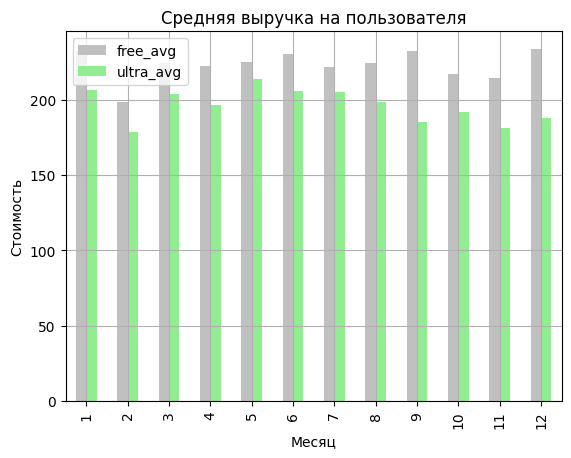

In [66]:
#график для визуализации
avg_per_month.plot(kind='bar', color=['silver','lightgreen'])

plt.grid(True)
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.title('Средняя выручка на пользователя')
plt.show()

Посчитаем среднюю стоимость поездки.

In [67]:
#средняя стоимость поездки free
(df_final.query('subscription_type == "free"')['revenue_per_month'].sum() / df_final.query('subscription_type == "free"')['total_rides'].sum()).round(2)

193.13

In [68]:
#средняя стоимость поездки Ultra
(df_final.query('subscription_type == "ultra"')['revenue_per_month'].sum() / df_final.query('subscription_type == "ultra"')['total_rides'].sum()).round(2)

253.01

Посчитаем среднемесячную выручку на пользователя в 2021 году.

In [69]:
# среднемесячная годовая выручка от пользователя free
(df_final.query('subscription_type == "free"')['revenue_per_month'].sum() / 
 users.query('subscription_type == "free"')['user_id'].count() / 12).round(2)

222.96

In [70]:
# среднемесячная годовая выручка от пользователя Ultra
(df_final.query('subscription_type == "ultra"')['revenue_per_month'].sum() / 
 users.query('subscription_type == "ultra"')['user_id'].count() / 12).round(2)

196.06

Посчитаем суммарную выручку за 2021 год по группам пользователей

In [71]:
# итого за 2021 год без подписки
df_final.query('subscription_type == "free"')['revenue_per_month'].sum()

2234104.0

In [72]:
#итого за 2021 год с подпиской Ultra
df_final.query('subscription_type == "ultra"')['revenue_per_month'].sum()

1644537.0

In [73]:
#общая выручка за 2021 год
df_final['revenue_per_month'].sum()

3878641.0

**Вывод:** средняя выручка по месяцам немного колеблется, но находится примерно на одном уровне на протяжении всего года. Минимальноые средние значения выручка принимает в феврале - 178,21 и 198,63 у клиентов с подпиской и без соответственно. Вероятно, по климатическим условиям. Самые высокие средние показатели выручки на одного пользователя приходятся на летние месяцы. Средняя выручка от пользоватлей без подписки немного выше, чем от пользователей без подписки. Это обусловлено тем, что клиенты без подписки берут самокаты в аренду почти вдвое чаще, при этом у клиентов с подпиской Ultra в среднем стоимость каждой отдельной поездки выше.  Среднемесячная выручка от клиентов с подпиской Ultra составила 196,06, без подписки - 222,96, что на 13,7% больше. Общая выручка за год от подписчиков Ultra составила 1644537,00, без подписки - 2234104,00 Общая выручка за год - 3878641.00.
Средняя цена аренды с учетом стоимости самой подписки у пользователей Ultra - 253, а без Ultra только 193.

## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

- Нулевая гипотеза: позователи с подпиской в среднем тратят столько же времени на поездки, сколько и пользователи без подписки. среднее значение `df_ultra['duration']` = среднему значению `df_free['duration']`.
- Альтернативная гипотеза: пользователи с подпиской в среднем тратят больше времени на поездки. среднее значение `df_ultra['duration']` > среднего значения `df_free['duration']`

In [74]:
alpha = 0.05

results = st.ttest_ind(df_ultra['duration'], 
                       df_free['duration'], 
                       alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


**Вывод:** такое маленькое значение p-value, близкое к нулю заметно ниже уровня значимости. Это означает, что вероятность получить такие или более экстремальные результаты при условии, что нулевая гипотеза верна, крайне мала.
В итоге, имеем основания отвергнуть гипотезу, что среднее время, проводимое всеми пользователями одинаково, так как вероятность получить одинаковый результат практически равна нулю. Склоняемся к гипотезе, что среднее время в поездках у пользователей с подпиской выше и они выгоднее компании.

In [75]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19124505225722097
Не получилось отвергнуть нулевую гипотезу


### Проверка оптимального использования самокатов пользователями с подпиской

Расстояние одной поездки в 3130 метров - оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу.
- Нулевая гипотеза: среднее значение `df_ultra['distance'] = 3130.`
- Альтернативная гипотеза: среднее значение `df_ultra['distance'] > 3130`

In [76]:
interested_value = 3130

alpha = 0.05 

results = st.ttest_1samp(df_ultra['distance'],
                         interested_value, 
                         alternative='greater')

print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** значение p-value большое, верятность случайно получить результат нулевой гипотезы высока, не получилось отвергнуть нулевую гипотезу. Среднее расстояние, которое проезжают подписчики ultra не выходит за оптимальные для самокатов 3130 метров

### Будет ли помесячная выручка от пользователей с подпиской выше?

- Нулевая гипотеза: средняя выручка от пользователей с подпиской равна средней выручке от пользователей без подписки.
- Альтернативная гипотеза: средняя выручка от пользователей с подпиской выше средней выручки от пользователей без подписки.

In [77]:
alpha = 0.05

results = st.ttest_ind(df_final.loc[df_final['subscription_type'] 
                       == 'ultra', 'revenue_per_month'], 
                       df_final.loc[df_final['subscription_type'] 
                       == 'free', 'revenue_per_month'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** p-value крайне мало, есть все основания отвергнуть нулевую гипотезу, т.к. при значении P-value близком нулю вероятность получить одинаковую выручку от пользователей без подписки и с подпиской также стремится к нулю. Склониться в пользу альтернативной гипотезы: средняя выручка от пользователей с подпиской выше средней выручки от пользователей без подписки.

### Какой тест понадобится для проверки изменения количества обращений в ТП после обновления приложения?

В данном случае подойдёт гипотеза о равенстве средних для зависимых выборок. Гипотезы будут сформулированы так:
- H0 : μ1 = μ2
- H1 : μ1 < μ2

где μ1 и μ2 - средние значения обращений в техподдержку ДО и ПОСЛЕ изменения.

Выборки в данном случае будут парными. Парная выборка оначает, что некоторая переменная будет измеряться дважды - до и после изменений. Гиптеза в данном случае будет односторонняя в левую сторону.

Метод, который нужно использовать при сравнении`: scipy.stats.ttest_rel`()

## 7. Общий вывод

Проведена предобработка данных:

- удалены явные дубликаты,
- добавлен столбец с номером месяца.

Произведён исследовательский анализ данных:
- определены города присутствия и количество пользователей в них - 8 городов с количеством пользователей от 168 до 219 человек,
- количество пользователей с подпиской составляет 46,6%, остальные ее еще не поключили,
- основная масса пользователей в возрасте от 22 до 28 лет,
- среднее расстояние за одну поездку составляет около 3100 метров
- среднее время аренды - 17,7 минут.

Объединение данных:
- данные убъединены в один датафрейм,
- созданы два датафрейма для пользователей с подпиской и без подписки,
- проведен отдельный анализ поведения пользователей с подпиской и без подписки. Среднее время аренды у обеих категорий примерно одинаковое и составляет 17-18 минут, среднее расстояние также примерно одинаковое - около 3100 метров однако пользователи без подписки имеют более обширный диапазон по пройденному расстоянию.

Подсчитана помесячная выручка по каждому пользователю:
 - средняя выручка в месяц на одного пользователя с подпиской Ultra - 196,06
 - средняя выручка в месяц на одного пользователя без подписки - 222,96
 - общая годовая выручка от пользователей с подпиской Ultra - 1644537,00
 - общая годовая выручка от пользователей без подписки - 2234104,00
 
 - средняя стоимость одной поездки у пользователей с подпиской Ultra - 253,01
 - средняя стоимость одной поездки у пользователей без подписки - 193,13

Проверены гипотезы: 
- Тратят ли пользователи с подпиской больше времени на поездки? Склоняемся к гипотезе, что пользователи с подпиской проводят больше времени в аренде.
- Расстояние одной поездки в 3130 метров - оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Но отвергаем гипотезу, что среднее расстояние у пользователей Ultra не превышает 3130 метров.
- Больше ли выручка от пользователей с подпиской, чем от пользователей без подписки? Не отвергаем гипотезу, что пользователи с подпиской приносят больше прибыли компании.

**Выводы и рекомендации:** 
- исследование показало, что пользователей с подпиской Ultra и без неё примерно одинаковое количество;
- пользователи без подписки берут самокаты в аренду почти вдвое чаще, но прибыли при этом приносят лишь на 13,7% больше, чем пользователи с подпиской;
- клиенты с попиской бережнее относятся к самокатам - скорость их передвижения ниже, а средее расстояние за поедку стремится к оптимальному для техники значению;
- необходима кампания по привлечению новых клиентов, например реферальная программа или бесплатная первая поездка;
- рекомендуется провести мероприятия по продвижению, чтобы мотивировать уже имеющихся пользователей поключить подписку Ultra с сохранением активности поездок, например раздача пробной подписки;
- на этапе обработки данных обнаружены поездки с неработающим таймером(поездки почти бесплатные), необходимо найти причину аномалии и устранить.